In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [20]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [3]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
# Read data

train_data = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")

In [5]:
#view first 5 rows train data
train_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# check number of rows and columns of train data

train_data.shape

(10000, 14)

In [7]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# #preprocessing

In [8]:
# checking missing values
train_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
## Check for Duplicates and Remove 
train_data.duplicated().sum() 
train_data.drop_duplicates(inplace = True)  

# Data Visualization

In [10]:
## Shows us the label counts
train_data["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

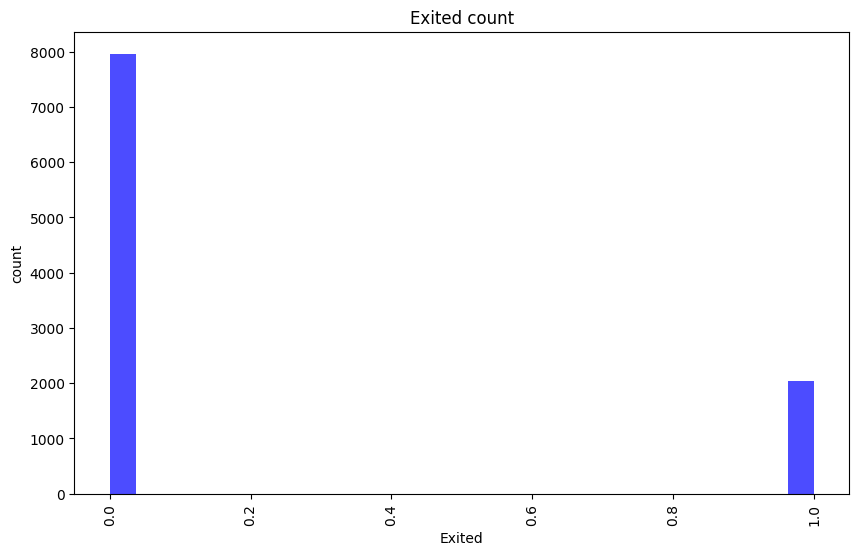

In [12]:
# Create a histogram of genre distribution
plt.figure(figsize=(10, 6))
plt.hist(train_data["Exited"],bins =27 , color='blue', alpha=0.7)
plt.title("Exited count")
plt.xlabel("Exited")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

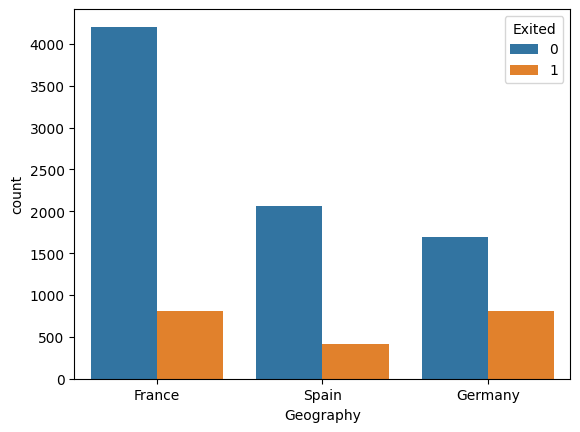

In [13]:
sns.countplot(x='Geography',hue='Exited',data=train_data)
plt.show()

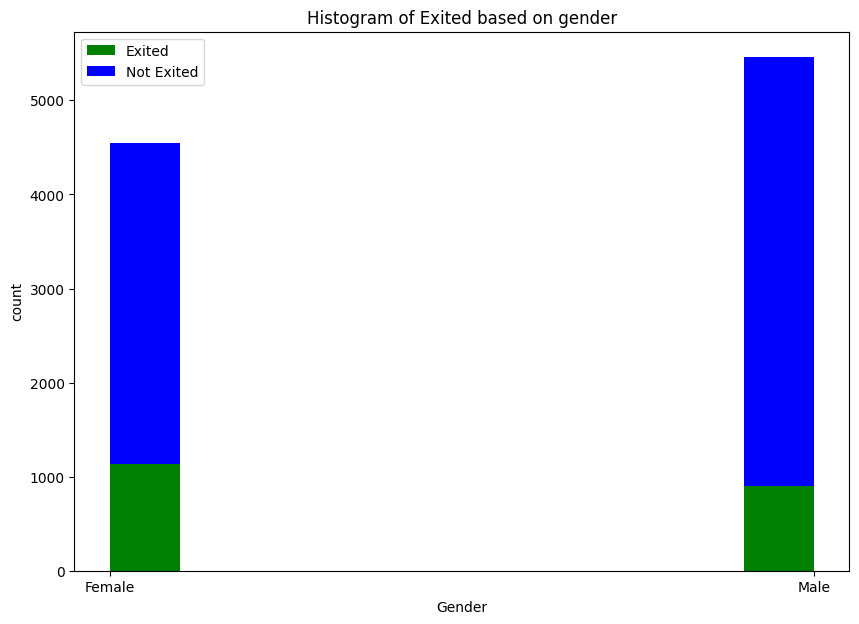

In [15]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [train_data[train_data['Exited']==1]['Gender'], train_data[train_data['Exited']==0]['Gender']],stacked=True, color = ['g','b'],label = ['Exited','Not Exited'])
plt.title('Histogram of Exited based on gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.legend()


# Spliting training and test data

In [17]:
# Separating features and Target

X=train_data.drop(columns=['Geography','Surname','Gender','Exited'], axis=1)
Y=train_data['Exited']

In [18]:
x_train ,x_test ,y_train ,y_test = train_test_split(X ,Y ,test_size = 0.3, random_state=2)

# Model Training

In [21]:

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)


In [22]:
#Initialize and train Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Initialize and train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)


RandomForestClassifier()

In [25]:
# Initialize and train Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [26]:
# Make predictions on the test data for each classifier
y_pred_lr = lr_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)
y_pred_gb = gb_model.predict(x_test)


In [27]:
# Evaluate the performance of each classifier
def evaluate_classifier(classifier_name, y_train, y_pred):
    accuracy = accuracy_score(y_train, y_pred)
    confusion = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)
    print(f"Classifier: {classifier_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")

evaluate_classifier("Logistic Regression", y_test, y_pred_lr)
evaluate_classifier("Random Forest", y_test, y_pred_rf)
evaluate_classifier("Gradient Boosting", y_test, y_pred_gb)

Classifier: Logistic Regression
Accuracy: 0.81
Confusion Matrix:
[[2415    0]
 [ 585    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2415
           1       0.00      0.00      0.00       585

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000

Classifier: Random Forest
Accuracy: 0.86
Confusion Matrix:
[[2325   90]
 [ 343  242]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2415
           1       0.73      0.41      0.53       585

    accuracy                           0.86      3000
   macro avg       0.80      0.69      0.72      3000
weighted avg       0.84      0.86      0.84      3000

Classifier: Gradient Boosting
Accuracy: 0.86
Confusion Matrix:
[[2337   78]
 [ 352  233]]
Classification Report:
         